# 1. Import and setup

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Setting up styling
sns.set(style="darkgrid")
sns.set_palette("flare")

print(sns.color_palette("flare").as_hex())
palette = sns.color_palette("flare").as_hex()
sns.color_palette("flare")

['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']


[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [9]:
RANDOM_STATE=42

# 2. Read dataset

In [10]:
df = pd.read_csv('../dataset/digital_final_27th_Oct.csv', index_col=0)
df.head()

hadm_id  alcoholism gender  anchor_age            deathtime  \
0  22698313           0      F          89  2164-09-06T02:23:00   
1  29562026           0      F          84                  NaN   
2  21607777           0      F          37                  NaN   
3  25233292           0      M          47                  NaN   
4  24214772           0      M          22                  NaN   

   hematocrit_serum  blood_urea_nitrogen  serum_creatinine  \
0              19.9                 40.0               1.0   
1              22.5                 26.0               0.7   
2              29.5                 31.0               2.0   
3              29.9                 97.0               6.8   
4              43.0                 11.0               0.9   

   Non_Invasive_Blood_Pressure_systolic  \
0                                 107.0   
1                                 118.0   
2                                  76.0   
3                                 137.0   
4                                 148.0   

   Non_Invasive_Blood_Pressure_diastolic  white_bloodcells  Glucose_serum  \
0                                   54.0              39.7          240.0   
1                                   96.0               7.1          116.0   
2                                   48.0              18.6          106.0   
3                                   85.0               9.7          110.0   
4                                   80.0              18.1          117.0   

   platelet_PLT  Prothrombin_time  aminotransferase_ALT  Total_Bilirubin  \
0         183.0              16.4                  28.0              0.4   
1         160.0              17.4                  27.0              2.8   
2         239.0              15.8                 168.0              1.1   
3         137.0              12.7                 473.0              0.4   
4         249.0              13.2                  24.0              0.4   

   Anion_gap  Heart_rate_Alarm_High  Heart_rate_Alarm_low  earliest_weight_kg  
0       23.0                  130.0                  40.0                56.0  
1       14.0                  120.0                  50.0                78.1  
2       13.0                  150.0                  40.0                52.2  
3       24.0                  130.0                  50.0               103.4  
4       11.0                  140.0                  40.0               101.0

In [11]:
# Label mortality
df['mortality'] = df['deathtime'].apply(lambda x: 'Survive' if x is np.nan else 'Dead')
df['mortality'].value_counts()

mortality
Survive    249
Dead        62
Name: count, dtype: int64

In [12]:
df.columns

Index(['hadm_id', 'alcoholism', 'gender', 'anchor_age', 'deathtime',
       'hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
       'Non_Invasive_Blood_Pressure_systolic',
       'Non_Invasive_Blood_Pressure_diastolic', 'white_bloodcells',
       'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
       'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap',
       'Heart_rate_Alarm_High', 'Heart_rate_Alarm_low', 'earliest_weight_kg',
       'mortality'],
      dtype='object')

# 3. Exploratory Data

## 3.1. General Statistics

In [13]:
df.shape

(311, 21)

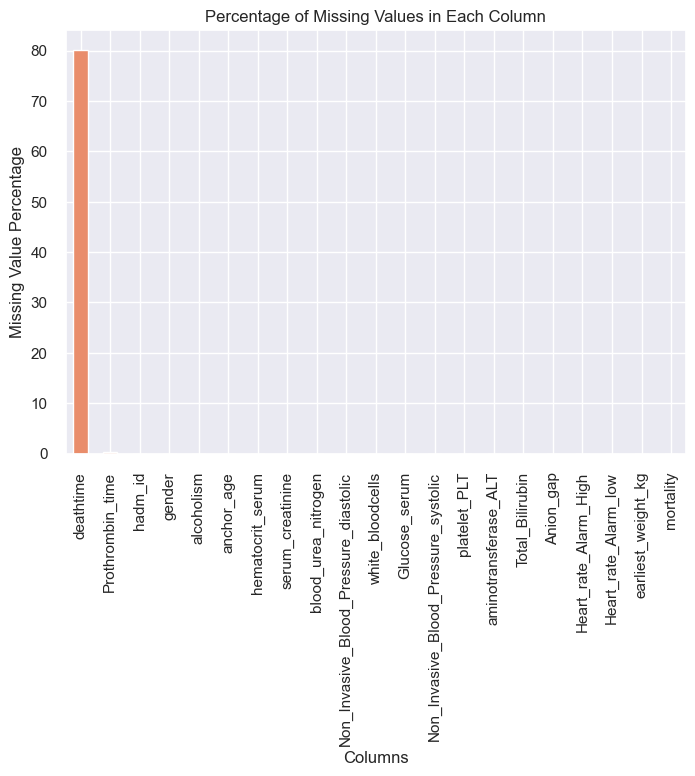

In [14]:
# Datatype and missing value information
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
    
missing_percentage.sort_values(ascending=False).plot(kind='bar', color=palette[0])
plt.xlabel('Columns')
plt.ylabel('Missing Value Percentage')
plt.title('Percentage of Missing Values in Each Column')
plt.show()

In [15]:
missing_columns = missing_percentage.sort_values(ascending=False)[:10]
missing_columns

deathtime                                80.064309
Prothrombin_time                          0.321543
hadm_id                                   0.000000
gender                                    0.000000
alcoholism                                0.000000
anchor_age                                0.000000
hematocrit_serum                          0.000000
serum_creatinine                          0.000000
blood_urea_nitrogen                       0.000000
Non_Invasive_Blood_Pressure_diastolic     0.000000
dtype: float64

Missing values are on `deathtime` (80%) and `Prothrombin_time` (0.3%). NaN values in `deathtime` contain information of moratlity. Missing values in `Prothrombin_time` is less than 5%, so we keep it.

In [22]:
df_clean = df
df_clean.head()

hadm_id  alcoholism gender  anchor_age            deathtime  \
0  22698313           0      F          89  2164-09-06T02:23:00   
1  29562026           0      F          84                  NaN   
2  21607777           0      F          37                  NaN   
3  25233292           0      M          47                  NaN   
4  24214772           0      M          22                  NaN   

   hematocrit_serum  blood_urea_nitrogen  serum_creatinine  \
0              19.9                 40.0               1.0   
1              22.5                 26.0               0.7   
2              29.5                 31.0               2.0   
3              29.9                 97.0               6.8   
4              43.0                 11.0               0.9   

   Non_Invasive_Blood_Pressure_systolic  \
0                                 107.0   
1                                 118.0   
2                                  76.0   
3                                 137.0   
4                                 148.0   

   Non_Invasive_Blood_Pressure_diastolic  ...  Glucose_serum  platelet_PLT  \
0                                   54.0  ...          240.0         183.0   
1                                   96.0  ...          116.0         160.0   
2                                   48.0  ...          106.0         239.0   
3                                   85.0  ...          110.0         137.0   
4                                   80.0  ...          117.0         249.0   

   Prothrombin_time  aminotransferase_ALT  Total_Bilirubin  Anion_gap  \
0              16.4                  28.0              0.4       23.0   
1              17.4                  27.0              2.8       14.0   
2              15.8                 168.0              1.1       13.0   
3              12.7                 473.0              0.4       24.0   
4              13.2                  24.0              0.4       11.0   

   Heart_rate_Alarm_High  Heart_rate_Alarm_low  earliest_weight_kg  mortality  
0                  130.0                  40.0                56.0       Dead  
1                  120.0                  50.0                78.1    Survive  
2                  150.0                  40.0                52.2    Survive  
3                  130.0                  50.0               103.4    Survive  
4                  140.0                  40.0               101.0    Survive  

[5 rows x 21 columns]

In [23]:
(df_clean.isnull().sum(axis=1) / df_clean.shape[1]).value_counts().sort_index()

0.000000     61
0.047619    250
Name: count, dtype: int64

There is no record with more than 5% missing values.

In [24]:
# Statistical description of numerical features
df_clean.describe(include=[np.number]).round(2)

hadm_id  alcoholism  anchor_age  hematocrit_serum  \
count       311.00      311.00      311.00            311.00   
mean   24968797.93        0.13       59.98             32.45   
std     2848398.04        0.34       17.64              7.46   
min    20009550.00        0.00       22.00             16.60   
25%    22547487.50        0.00       48.00             27.30   
50%    24961541.00        0.00       61.00             31.40   
75%    27380606.50        0.00       73.00             37.10   
max    29995505.00        1.00       91.00             54.30   

       blood_urea_nitrogen  serum_creatinine  \
count               311.00            311.00   
mean                 31.84              1.81   
std                  27.77              1.89   
min                   1.00              0.10   
25%                  14.00              0.80   
50%                  23.00              1.10   
75%                  40.50              2.10   
max                 163.00             20.40   

       Non_Invasive_Blood_Pressure_systolic  \
count                                311.00   
mean                                 123.07   
std                                   27.23   
min                                   57.00   
25%                                  103.00   
50%                                  121.00   
75%                                  140.50   
max                                  259.00   

       Non_Invasive_Blood_Pressure_diastolic  white_bloodcells  Glucose_serum  \
count                                 311.00            311.00         311.00   
mean                                   70.53             13.82         152.17   
std                                    19.79             11.79          92.15   
min                                    25.00              0.20          36.00   
25%                                    56.00              7.20         103.00   
50%                                    68.00             11.30         133.00   
75%                                    83.00             17.60         168.00   
max                                   142.00            156.20         817.00   

       platelet_PLT  Prothrombin_time  aminotransferase_ALT  Total_Bilirubin  \
count        311.00            310.00                311.00           311.00   
mean         221.18             17.75                195.26             2.76   
std          142.87             10.48                641.63             5.56   
min            6.00              8.80                  2.00             0.00   
25%          117.50             13.40                 18.00             0.50   
50%          198.00             15.40                 35.00             1.00   
75%          290.00             18.58                106.00             2.50   
max          942.00            150.00               8805.00            53.10   

       Anion_gap  Heart_rate_Alarm_High  Heart_rate_Alarm_low  \
count     311.00                 311.00                311.00   
mean       15.94                 125.37                 52.75   
std         5.38                  10.08                  5.98   
min         5.00                 100.00                 40.00   
25%        13.00                 120.00                 50.00   
50%        15.00                 120.00                 50.00   
75%        18.00                 130.00                 60.00   
max        44.00                 170.00                 90.00   

       earliest_weight_kg  
count              311.00  
mean                80.41  
std                 22.56  
min                 32.00  
25%                 64.95  
50%                 78.00  
75%                 93.00  
max                166.60

In [25]:
# Statistical description of categorical features
df_clean.describe(include=[np.object_])

gender            deathtime mortality
count     311                   62       311
unique      2                   62         2
top         M  2164-09-06T02:23:00   Survive
freq      163                    1       249

In [26]:
# Number of distinct patients
print('Number of distinct patients: ', df_clean.hadm_id.unique().shape[0])
print('Number of duplication', len(df_clean[df_clean.duplicated()]))

Number of distinct patients:  311
Number of duplication 0


In [27]:
df_clean.columns

Index(['hadm_id', 'alcoholism', 'gender', 'anchor_age', 'deathtime',
       'hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
       'Non_Invasive_Blood_Pressure_systolic',
       'Non_Invasive_Blood_Pressure_diastolic', 'white_bloodcells',
       'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
       'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap',
       'Heart_rate_Alarm_High', 'Heart_rate_Alarm_low', 'earliest_weight_kg',
       'mortality'],
      dtype='object')

In [43]:
features_kde = ['hematocrit_serum', 'blood_urea_nitrogen', 'serum_creatinine',
                'Non_Invasive_Blood_Pressure_systolic',
                'Non_Invasive_Blood_Pressure_diastolic', 'white_bloodcells',
                'Glucose_serum', 'platelet_PLT', 'Prothrombin_time',
                'aminotransferase_ALT', 'Total_Bilirubin', 'Anion_gap',
                'Heart_rate_Alarm_High', 'Heart_rate_Alarm_low', 'earliest_weight_kg']

## 3.2.  Univariate analysis

#### Distribution of Gender

In [44]:
# Distribution of gender
gender_counts = df['gender'].value_counts()
gender_counts

gender
M    163
F    148
Name: count, dtype: int64

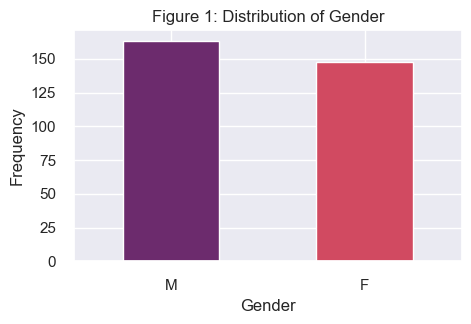

In [45]:
plt.figure(figsize=(5,3))
gender_counts.plot(kind='bar', title='Figure 1: Distribution of Gender', xlabel='Gender', ylabel='Frequency',
                   rot=0, color=[palette[-1], palette[-4]])
plt.show()

The distribution of gender is balanced.

#### Alcoholism

In [46]:
# Distribution of comorbidity index
alc_counts = df_clean['alcoholism'].value_counts()
alc_counts

alcoholism
0    271
1     40
Name: count, dtype: int64

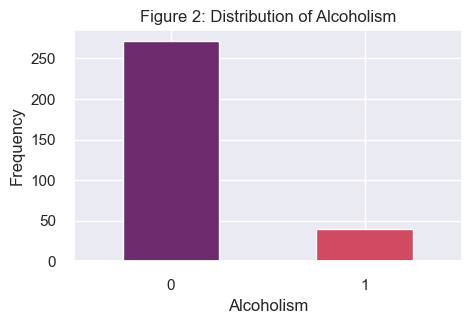

In [47]:
plt.figure(figsize=(5,3))
alc_counts.plot(kind='bar', title='Figure 2: Distribution of Alcoholism', xlabel='Alcoholism', ylabel='Frequency',
                   rot=0, color=[palette[-1], palette[-4]])
plt.show()

Most patients are non-alcoholism with 12.9% only.

#### Anchor age

In [48]:
# Group age by 10 years
bins = list(range(20, 101, 10))
age_groups = pd.cut(df_clean['anchor_age'], bins=bins, right=False)
ageg_counts = age_groups.value_counts().sort_index()

# Grouped age counts
print(ageg_counts)

anchor_age
[20, 30)     21
[30, 40)     23
[40, 50)     44
[50, 60)     51
[60, 70)     74
[70, 80)     52
[80, 90)     38
[90, 100)     8
Name: count, dtype: int64


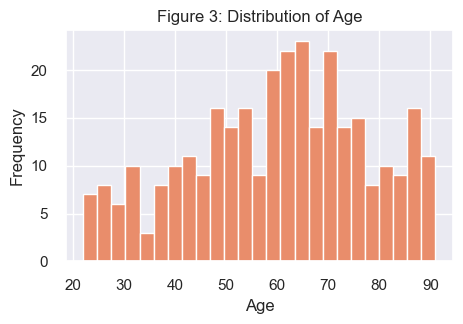

In [49]:
plt.figure(figsize=(5,3))
df_clean['anchor_age'].plot(kind='hist', title='Figure 3: Distribution of Age',ylabel='Frequency',
                      rot=0, bins=25).set_xlabel('Age')
plt.show()

Patients are mostly on their 50-80.

#### Date of death

In [50]:
# Distribution of date of death
dod_counts = df['deathtime'].value_counts(dropna=False)
dod_counts[:10]

deathtime
NaN                    249
2164-09-06T02:23:00      1
2110-09-22T20:55:00      1
2180-07-23T05:44:00      1
2131-07-22T01:17:00      1
2149-07-25T15:00:00      1
2158-09-25T03:59:00      1
2161-09-17T15:43:00      1
2191-01-10T18:55:00      1
2178-03-03T16:00:00      1
Name: count, dtype: int64

In [51]:
print("Number of patients survived is", len(df[df.mortality == 'Survive']))
print(f"Mortality rate is {round(100* len(df[df.mortality == 'Dead']) / len(df),2)}%")

Number of patients survived is 249
Mortality rate is 19.94%


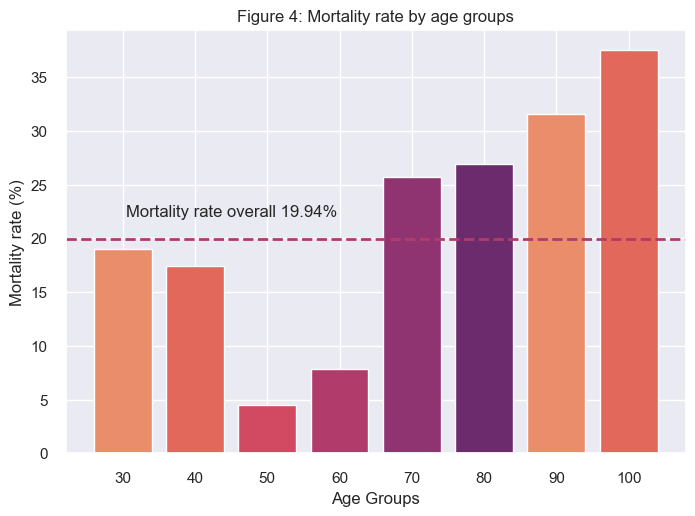

In [52]:
# Mortality rate in each age groups
rate_age = pd.DataFrame(zip(df['mortality'], age_groups), columns=['mortality', 'age_groups'])
total = rate_age.groupby(['age_groups']).count()
rate = pd.DataFrame(rate_age.groupby(['age_groups', 'mortality']).size()).reset_index().drop_duplicates(subset=['age_groups'], keep="first")
mortality_rate = 100 * rate.iloc[:,2].values / total.values[:,0]

plt.bar(["30", "40", "50", "60", "70", "80", "90", "100"], mortality_rate, color=palette)
plt.axhline(y=round(100* len(df[df.mortality == 'Dead']) / len(df),2), color=palette[3], linestyle='--', linewidth=2, label='Mortality rate')
plt.annotate('Mortality rate overall 19.94%', xy=(0, 20), xytext=(0.05, 22))

plt.xlabel("Age Groups")
plt.ylabel("Mortality rate (%)")
plt.title("Figure 4: Mortality rate by age groups")

plt.show()

Mortality rate drawn from sample is 19.94% with the highest rate being in the older people aged more than 70.

#### Others

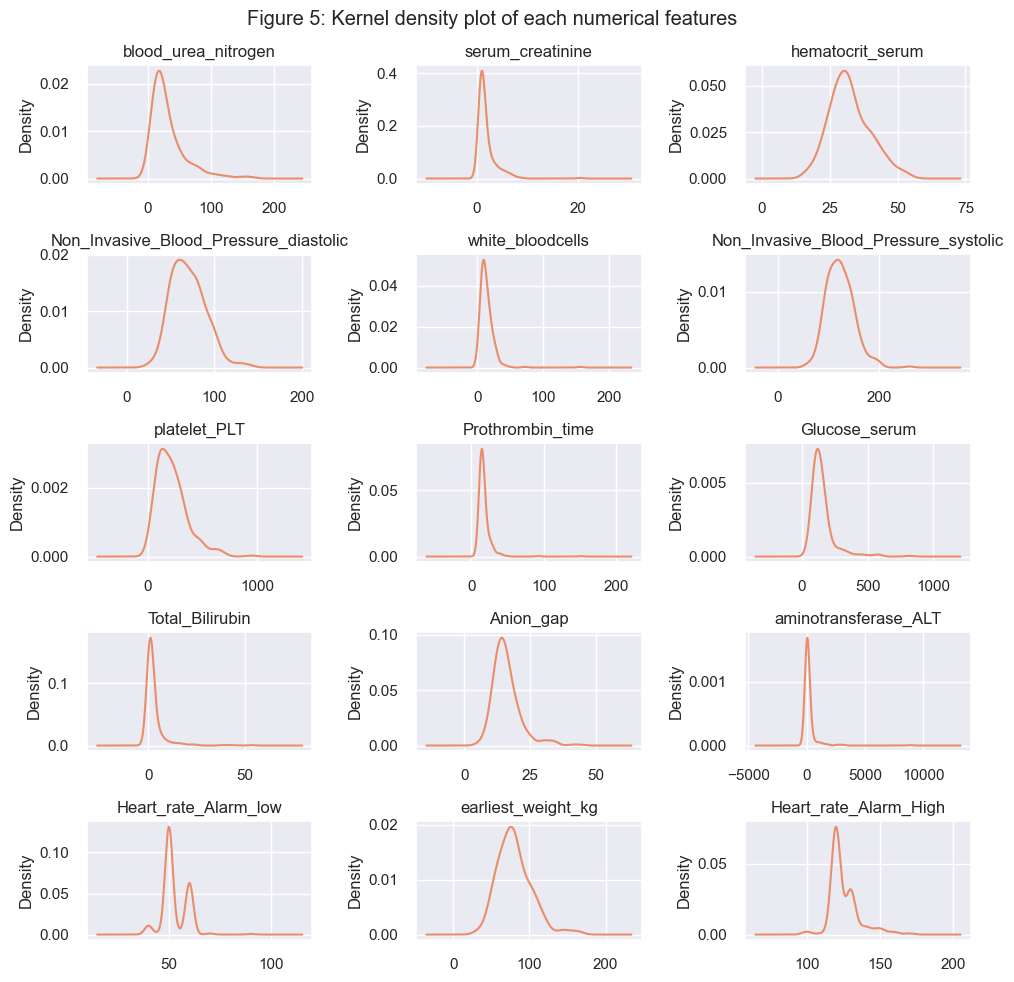

In [64]:
fig, axes = plt.subplots(5,3, figsize=(10,10))

for i, col in enumerate(features_kde):
    df_clean[col].plot(ax=axes[i//3, i%3-1], kind='kde', title=col)
    
plt.suptitle("Figure 5: Kernel density plot of each numerical features")
plt.tight_layout()
plt.show()

The distribution of the numerical dataset is positive skewed with `Heart_rate_Alarm_low` and `Heart_rate_Alarm_High` being bimodal.

## 3.3. Multivariate analysis

#### Helper function

In [65]:
"""
Plots histogram and boxplot to compare difference in distribution of given label
- label: the feature to be compared
- title: title of the figure
"""
def plot_mean_difference(df, label, title, colours):
    fig, axes = plt.subplots(2, len(features_kde), figsize=(30, 7))
    value = df[label].unique()
    p_vals = []

    for i in range(len(features_kde)):
        feature = features_kde[i]
        for j, val in enumerate(df[label].unique()):
            sns.kdeplot(df[df[label] == val][feature], ax=axes[0, i], fill=True, label=val, color=colours[j])
        axes[0, i].set(ylabel=None)
        axes[0, i].set(xlabel=None)
        axes[0, i].set_title(feature)

        sns.boxplot(ax=axes[1, i], x=label, y=feature, data=df, palette=colours)
        axes[1, i].set(ylabel=None)
        axes[1, i].set(xlabel=None)
        
        t_statistic, p_value = ttest_ind(df[df[label] == value[0]][feature].dropna(),
                                 df[df[label] == value[1]][feature].dropna())
        p_vals.append(p_value)
    axes[0,-1].legend(title=label)

    fig.suptitle(title)
    plt.show()
    return dict(zip(features_kde, p_vals))

"""
Plot coefficient correlation inside a pair plot, used in pair_plot function
"""
def reg_coef(x,y,label=None,color=None,hue=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    marker_size = abs(r) * 10000
    ax.scatter([.5], [.5], marker_size, [r], alpha=0.6, cmap="flare",
            vmin=-1, vmax=1, transform=ax.transAxes)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

"""
Plot pair grid of bivariate analysis, includes scatter plot and correlation computation
- df: dataframe containing all features
- label: the feature to be compared
- title: title of figure
"""
def pair_plot(df, label, title, colours):
    g = sns.PairGrid(df, hue=label, diag_sharey=False, palette=colours)
    g.map_upper(reg_coef, hue=None)
    g.map_diag(sns.kdeplot, fill=True)
    g.map_lower(sns.scatterplot)

    g.add_legend(adjust_subtitles=True, title=label)
    g.fig.subplots_adjust(top=0.95)
    g.fig.suptitle(title)

    plt.show()

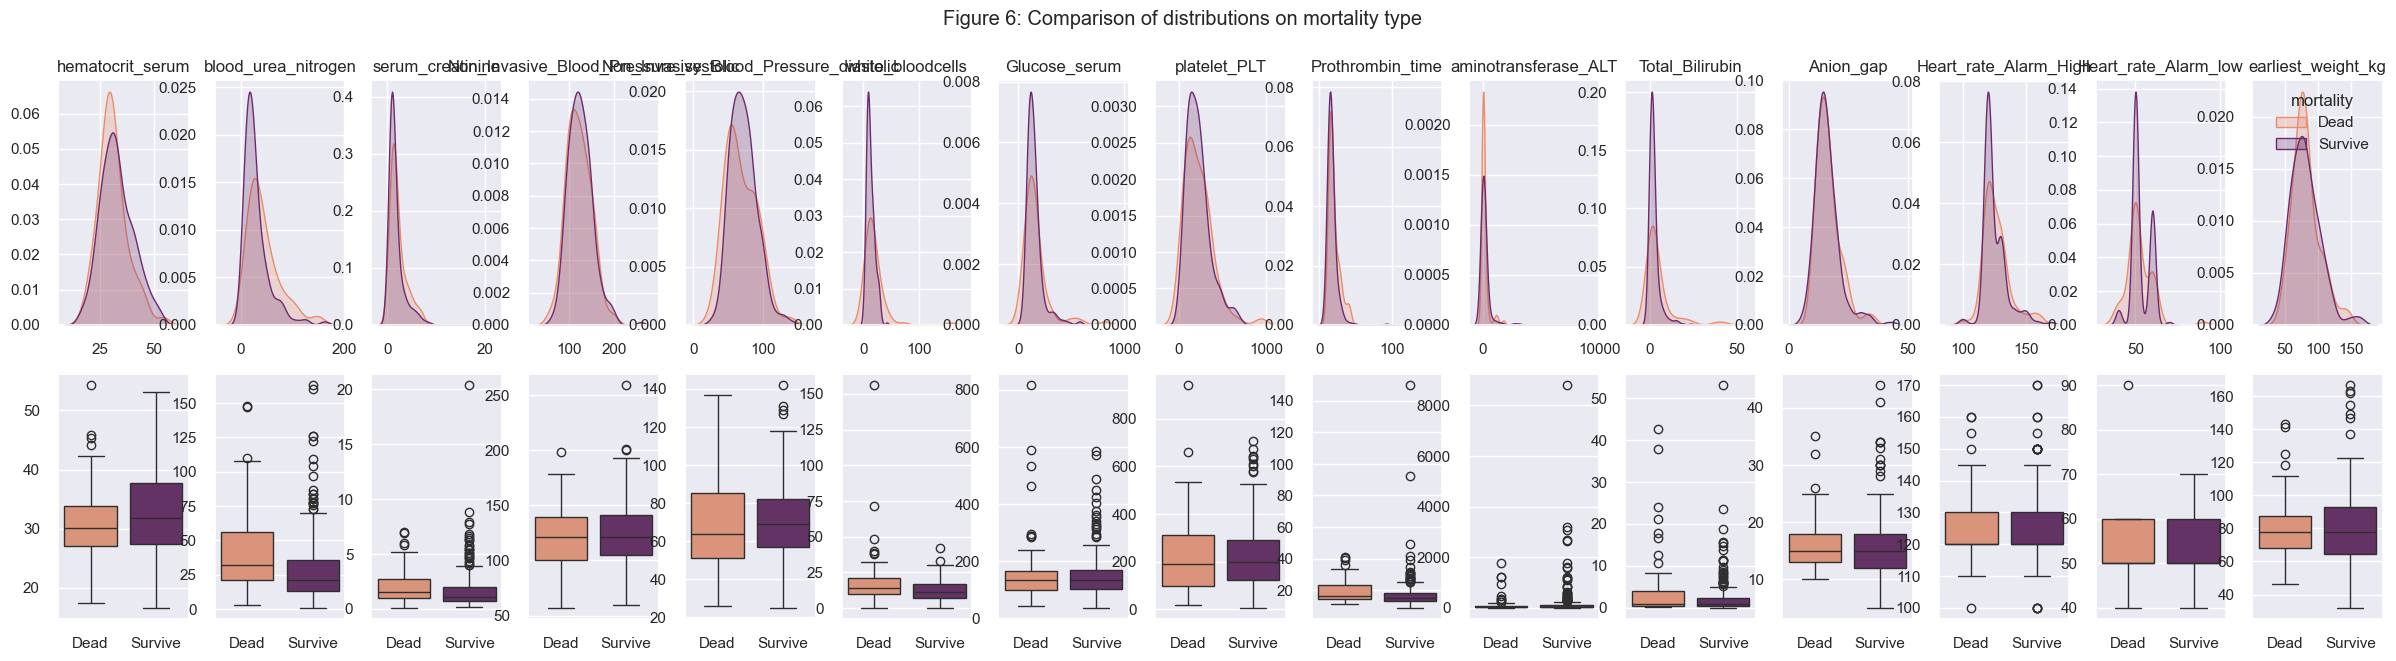

{'hematocrit_serum': 0.0769418350741278,
 'blood_urea_nitrogen': 0.00030471927612754575,
 'serum_creatinine': 0.17279698399146126,
 'Non_Invasive_Blood_Pressure_systolic': 0.38090654387873524,
 'Non_Invasive_Blood_Pressure_diastolic': 0.27091427843102034,
 'white_bloodcells': 0.00015158802870598832,
 'Glucose_serum': 0.23295658572574263,
 'platelet_PLT': 0.830467270853563,
 'Prothrombin_time': 0.12513914407721677,
 'aminotransferase_ALT': 0.534442904748514,
 'Total_Bilirubin': 0.005546345842011416,
 'Anion_gap': 0.569614502560437,
 'Heart_rate_Alarm_High': 0.3456438656888088,
 'Heart_rate_Alarm_low': 0.3375843292825327,
 'earliest_weight_kg': 0.7369419295288159}

In [66]:
plot_mean_difference(df_clean, 'mortality', "Figure 6: Comparison of distributions on mortality type", [palette[0], palette[-1]])

Statistically, feature with significant difference (p<0.05) in mortality is `blood_urea_nitrogen` (Survive patients lower), `Total_Bilirubin` (Survive patients lower), and `white_bloodcells` (Survive patients lower).

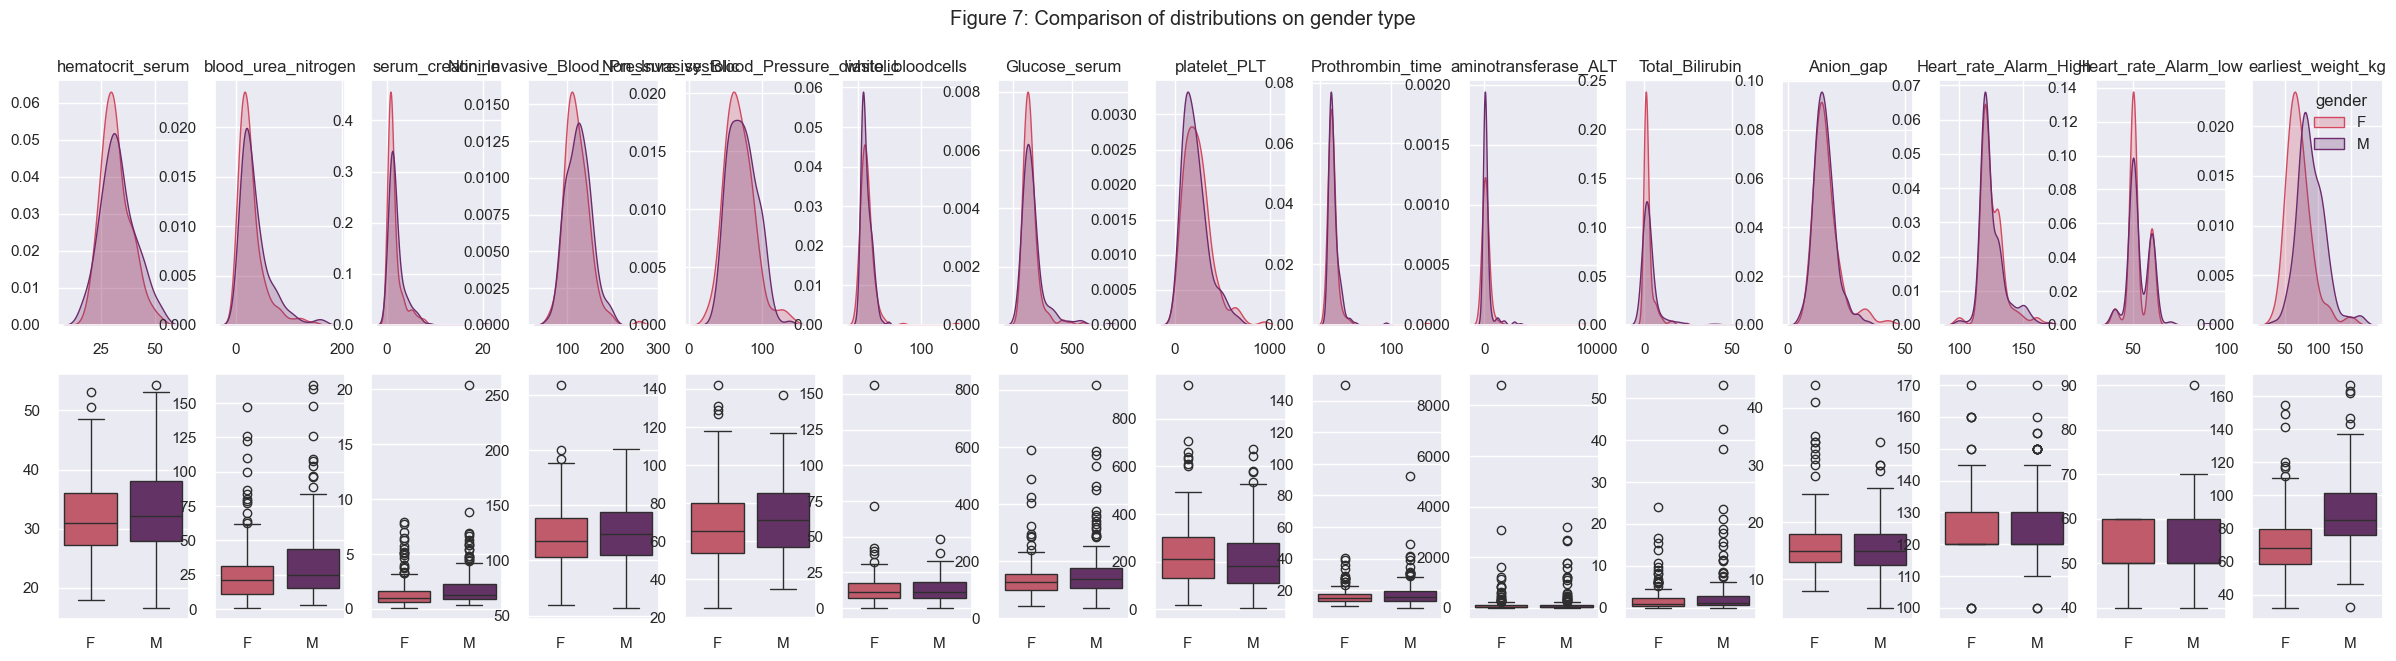

{'hematocrit_serum': 0.16238269941088335,
 'blood_urea_nitrogen': 0.01066440496663309,
 'serum_creatinine': 0.022146193103121256,
 'Non_Invasive_Blood_Pressure_systolic': 0.2061861832414846,
 'Non_Invasive_Blood_Pressure_diastolic': 0.05437851729021635,
 'white_bloodcells': 0.3493470515062792,
 'Glucose_serum': 0.08316953262071569,
 'platelet_PLT': 0.08236706160709532,
 'Prothrombin_time': 0.43035403608548106,
 'aminotransferase_ALT': 0.9410406960510778,
 'Total_Bilirubin': 0.04232267126175229,
 'Anion_gap': 0.1539812079058172,
 'Heart_rate_Alarm_High': 0.9975489798435567,
 'Heart_rate_Alarm_low': 0.17249111464715508,
 'earliest_weight_kg': 6.087768127605928e-14}

In [67]:
plot_mean_difference(df_clean, 'gender', "Figure 7: Comparison of distributions on gender type", [palette[-4], palette[-1]])

Statistically, feature with significant difference (p<0.05) in gender is `blood_urea_nitrogen`, `serum_creatinine`, `Total_Bilirubin`, `white_bloodcells`, and `earliest_weight_kg`.

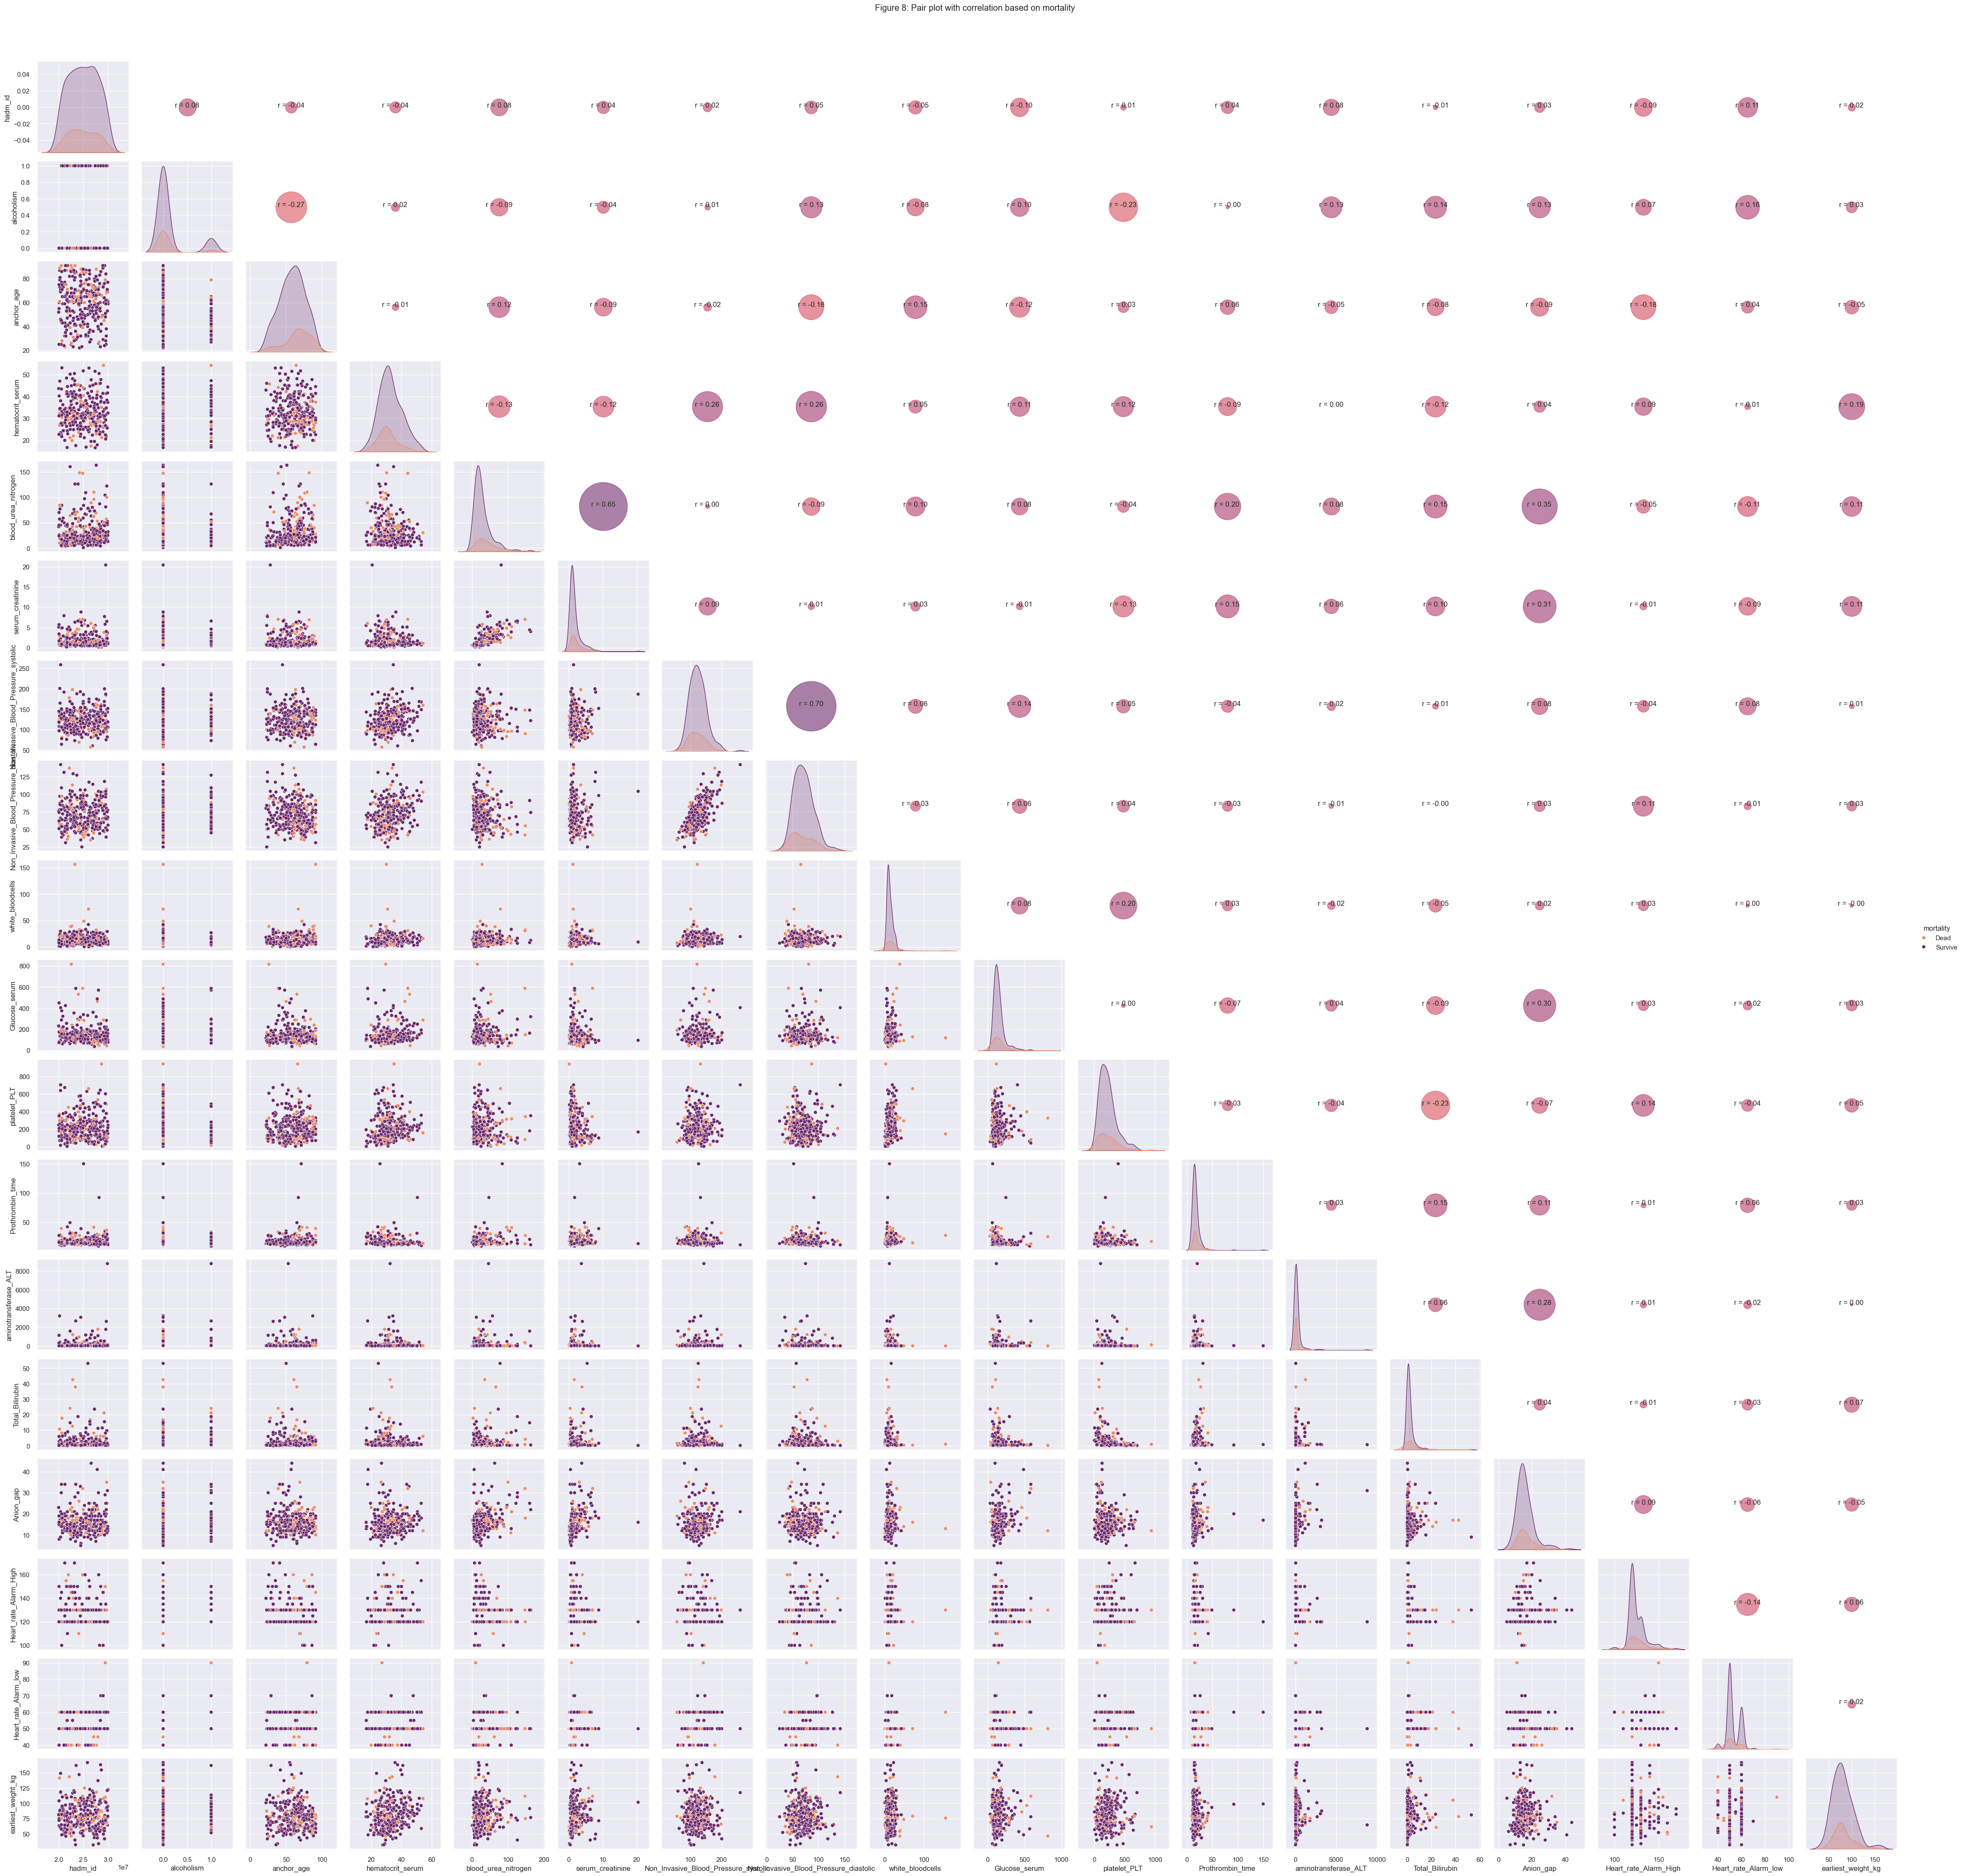

In [72]:
pair_plot(df_clean.drop(['deathtime'], axis=1).dropna(), 
          'mortality', 
          "Figure 8: Pair plot with correlation based on mortality", 
          [palette[0], palette[-1]])